In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

**Ordinal Encoding** - This technique of encoding is usually used for categorical variables which has natural order to it o rank can be assigned to the values of these variables. It helps the model to understand that there is some rank to these values and the model provides priority accordingly.

**Label Encoding** - This technique of encoding is also similar to Ordinal Encoding and is used for converting categorical variables to numerical ones. It assigns a particular label as we decide what numerical value to assign to which categorical variable. But this in turn also creates an internal ordering between the values and hence the model can learn incorrectly.

**Note** - Usually Ordinal Encoding is used for Feature variables and Label Encoding is used for Target Variables.

#### Ordinal Encoding Example

In [2]:
df = pd.DataFrame({
    "degree" : ["school", "high school", "college", "graduate", "post graduate", "Phd"]
})
df.head()

,degree
0,school
1,high school
2,college
3,graduate
4,post graduate


In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[["school", "high school", "college", "graduate", "post graduate", "Phd"]])
ordinal.fit(df[["degree"]])
final_df = pd.DataFrame(data=ordinal.transform(df[["degree"]]), columns=ordinal.feature_names_in_)
final_df.head()

,degree
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


#### Label Encoding Example

In [9]:
df.head()

,degree
0,school
1,high school
2,college
3,graduate
4,post graduate


In [19]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
lbl_encoder.fit(df[["degree"]])

final_df_2 = pd.DataFrame(data=lbl_encoder.transform(df[["degree"]]), columns=["degree"])
final_df_2.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,degree
0,5
1,3
2,1
3,2
4,4


In [18]:
lbl_encoder_name_mapping = dict(zip(lbl_encoder.classes_, lbl_encoder.transform(lbl_encoder.classes_)))
print(lbl_encoder_name_mapping)

{'Phd': 0, 'college': 1, 'graduate': 2, 'high school': 3, 'post graduate': 4, 'school': 5}


## Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

**Target Guided Ordinal Encoding** - It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

#### Example of Target Guided Ordinal Encoding

In [21]:
df = pd.DataFrame({
    "city" : ["Kolkata", "Bangalore", "Chennai", "Hyderabad", "Kolkata", "Delhi", "Mumbai", "Delhi"],
    "house_price" : [1000, 3000, 1500, 2000, 1300, 2700, 5000, 2500]
})
df.head()

,city,house_price
0,Kolkata,1000
1,Bangalore,3000
2,Chennai,1500
3,Hyderabad,2000
4,Kolkata,1300


So here we can observe that **"city"** is a categorical variable and the house_price varies with the city also. For example, compared to Kolkata, house prices are more in other metro cities like Delhi, Mumbaia nd Bangalore. 

So here is a perfect dataset to perform Target Guided Ordinal Encoding.

In [35]:
city_price_dict = df.groupby(by="city")["house_price"].mean().to_dict()
city_price_dict

{'Bangalore': 3000.0,
 'Chennai': 1500.0,
 'Delhi': 2600.0,
 'Hyderabad': 2000.0,
 'Kolkata': 1150.0,
 'Mumbai': 5000.0}

In [38]:
df["city_encode"] = df["city"].map(city_price_dict)
df

,city,house_price,city_encode
0,Kolkata,1000,1150.0
1,Bangalore,3000,3000.0
2,Chennai,1500,1500.0
3,Hyderabad,2000,2000.0
4,Kolkata,1300,1150.0
5,Delhi,2700,2600.0
6,Mumbai,5000,5000.0
7,Delhi,2500,2600.0


## Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

**Covariance** - Covariance is a measured use to determine how much variable change in randomly. The covariance is a product of the units of the two variables. The value of covariance lies between -$\infty$ and +$\infty$,  **with a negative value indicating a negative relationship and a positive value indicating a positive relationship**. The covariance of two variables (x and y) can be represented by cov(x,y). The formula for calculating covariance is as shown below:

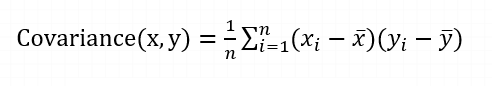

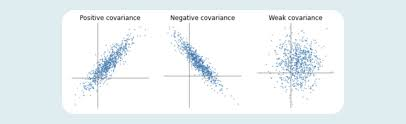

#### <u>Covariance Importance in Statistical Analysis</u>

1. It helps to identify the relationship between the different numerical variables of a dataset and thus helps to identify the features which are more important.
2. Positive covariance implies positive relationship i.e. the variables have a monotonically increasing or decreasing relationship. Whereas negative covariance implies the variables are inversely proportional to one another.
3. The value of covariance is not much important but whether it is postive or negative that plays a key role in statistical analysis.

In [41]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


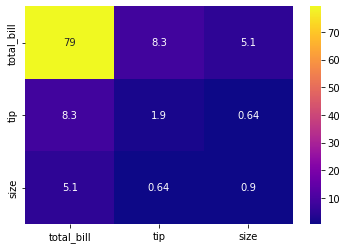

In [49]:
cov = df.cov()
sns.heatmap(cov, annot=True, cmap="plasma")
plt.show()

## Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [60]:
color = ["red", "green", "blue"]
size = ["small", "medium", "large"]
material = ["wood", "metal", "plastic"]

df = pd.DataFrame({
    "color" : color,
    "size" : size,
    "material" : material
})

df.head()

,color,size,material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [61]:
# Label ENcoding the categorical columns
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
final_df = pd.DataFrame()

for col in df.columns:
    final_df[col] = pd.DataFrame(lbl_encoder.fit_transform(df[col]))

final_df

,color,size,material
0,2,2,2
1,1,1,0
2,0,0,1


The above dataframe shows the conversion of categorical features to their numerical counterpart. All of these variables are converted independently and they are labelled according to the alphabetical order. There is no inherent meaning to this labelling other than the numerical values but it brings with itself the curse of ordering which may not be suitable for the dataset all the time. Usually, Label Encoding is used for Target Columns and not Feature Columns.

## Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

In [64]:
age = [25,26,27,28,29,30,31,32,33,34,35]
income = [1000,2000,1500,3000,5000,6000,10000,9500,7500,8000,12000]
education = ["Grad","PG","MS","Phd","PostDoc","Grad","PG","Phd","MS","ME","Grad"]

df = pd.DataFrame({
    "age" : age,
    "income" : income,
    "education" : education
})

df.head()

,age,income,education
0,25,1000,Grad
1,26,2000,PG
2,27,1500,MS
3,28,3000,Phd
4,29,5000,PostDoc


In [71]:
# Let's first convert the categorical variable to Numerical variable. Since there is a rank or order in education, we should
# perform Ordinal Encoding for this variable
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[["Grad", "PG", "MS", "ME", "Phd", "PostDoc"]])
ordinal.fit(df[["education"]])

final_df = df.copy()

final_df["education"] = ordinal.transform(final_df[["education"]])

final_df

,age,income,education
0,25,1000,0.0
1,26,2000,1.0
2,27,1500,2.0
3,28,3000,4.0
4,29,5000,5.0
5,30,6000,0.0
6,31,10000,1.0
7,32,9500,4.0
8,33,7500,2.0
9,34,8000,3.0


In [77]:
# Covariance Matrix
cov = final_df.cov()
cov

,age,income,education
age,11.0,1.150000e+04,0.4
income,11500.0,1.417273e+07,-200.0
education,0.4,-2.000000e+02,3.2


In [76]:
# Correlation Matrix
corr = final_df.corr(method="spearman")
corr

,age,income,education
age,1.000000,0.909091,0.069293
income,0.909091,1.000000,-0.004620
education,0.069293,-0.004620,1.000000


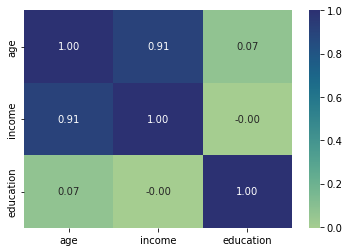

In [83]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="crest")
plt.show()

From the above correlation matrix, we can observe that "Age" and "Income" are highly correlated.

<AxesSubplot:xlabel='age', ylabel='income'>

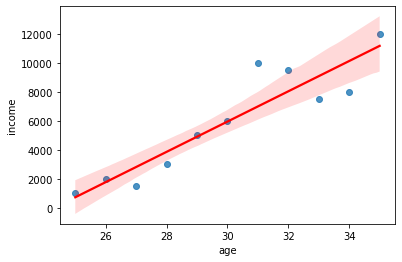

In [86]:
sns.regplot(data = final_df, x="age", y="income", line_kws={"color": "red"})

## Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

The dataset contains the following categorical variables:

1. **Gender (Male/Female)**
2. **Education Level (High School/Bachelor's/Master's/PhD)**
3. **Employment Status (Unemployed/Part-Time/Full-Time)**

We have to convert all of these categorical variables to numerical variables. For this we need to decide what sort of encoding to use. This is discussed below:

1. **Gender** - This variable has only 2 values- Male or Femlae. This variable doesn't have any natural ordering nor can any rank be assigned to these values. Hence these are Nominal variables and we should perform **Nominal Encoding** for this using One Hot Encoder.

2. **Education Level** - This variable has multiple values as shown earlier and all these values have a natural ordering and rank can be assigned to them as a person can only undergo Bachelor's degree once that person completes schooling and this also provides with a higher degree. Hence we should be performing **Ordinal Encoding** for this variable.

3. **Employment Status** - This variable also has multiple distinct values but no ordering can be assigned to them. Hence **Nominal Encoding** using One Hot Encoder should be performed for this feature.

**Note:** Any type of encoding that we perform should be done based on the dataset and what outcome we expect from the dataset. Understanding the meaning and relation of each variable plays a crucial role in order to decide the type of encoding.

## Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [88]:
np.random.seed(42)

n = 100

temp = np.random.normal(loc = 35, scale = 5, size = n)
humidity = np.random.normal(loc = 70, scale = 10, size = n)
weather = np.random.choice(["Sunny","Cloudy","Rainy"], size=n)
wind = np.random.choice(["North","South","East","West"], size=n)

df = pd.DataFrame({
    "temperature" : temp,
    "humidity" : humidity,
    "weather" : weather,
    "wind_direction" : wind
})

df.head()

,temperature,humidity,weather,wind_direction
0,37.483571,55.846293,Cloudy,South
1,34.308678,65.793547,Cloudy,North
2,38.238443,66.572855,Sunny,North
3,42.615149,61.977227,Sunny,South
4,33.829233,68.387143,Sunny,West


In [92]:
# Both the categorical variables doesn't have any nayural ordering hence performing Nominal Encoding
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
onehot.fit(df[["weather","wind_direction"]])

final_df = pd.DataFrame(data=onehot.transform(df[["weather", "wind_direction"]]).toarray(), columns=onehot.get_feature_names_out())
final_df.head()

,weather_Cloudy,weather_Rainy,weather_Sunny,wind_direction_East,wind_direction_North,wind_direction_South,wind_direction_West
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [94]:
final_df = pd.concat([df["temperature"], df["humidity"], final_df], axis=1)
final_df.head()

,temperature,humidity,weather_Cloudy,weather_Rainy,weather_Sunny,wind_direction_East,wind_direction_North,wind_direction_South,wind_direction_West
0,37.483571,55.846293,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34.308678,65.793547,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.238443,66.572855,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42.615149,61.977227,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,33.829233,68.387143,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [95]:
# Performing Covariance matrix calculation
cov = final_df.cov()
cov

,temperature,humidity,weather_Cloudy,weather_Rainy,weather_Sunny,wind_direction_East,wind_direction_North,wind_direction_South,wind_direction_West
temperature,20.619247,-5.907710,-0.247653,0.121000,0.126653,0.127155,-0.249555,0.123804,-0.001404
humidity,-5.907710,90.948450,0.005314,0.218128,-0.223442,0.398487,-0.040209,-0.550820,0.192543
weather_Cloudy,-0.247653,0.005314,0.235455,-0.112121,-0.123333,-0.016768,-0.026465,0.012828,0.030404
weather_Rainy,0.121000,0.218128,-0.112121,0.212121,-0.100000,-0.004040,0.012121,0.003030,-0.011111
weather_Sunny,0.126653,-0.223442,-0.123333,-0.100000,0.223333,0.020808,0.014343,-0.015859,-0.019293
wind_direction_East,0.127155,0.398487,-0.016768,-0.004040,0.020808,0.149091,-0.047273,-0.052727,-0.049091
wind_direction_North,-0.249555,-0.040209,-0.026465,0.012121,0.014343,-0.047273,0.194343,-0.076162,-0.070909
wind_direction_South,0.123804,-0.550820,0.012828,0.003030,-0.015859,-0.052727,-0.076162,0.207980,-0.079091
wind_direction_West,-0.001404,0.192543,0.030404,-0.011111,-0.019293,-0.049091,-0.070909,-0.079091,0.199091


We all know that if temperature increases then humidity decreases. The same is also shown in the covariance matrix. This shows that both of these variables are inversely proportional to one another as they have a negative covariance of **-5.907710**.

But both of these variables do not show much relation with wind direction and weather.